In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torchvision.models import resnet18, resnet50

# Define a custom autoencoder network for learning and generating images
class ImageAutoencoder(nn.Module):
    def __init__(self):
        super(ImageAutoencoder, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=4, stride=2, padding=1),  # Input: 3 channels (RGB), Output: 32 channels
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=4, stride=2, padding=1),  # Output: 64 channels
            nn.ReLU(),
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=1),  # Input: 64 channels, Output: 32 channels
            nn.ReLU(),
            nn.ConvTranspose2d(32, 3, kernel_size=4, stride=2, padding=1),  # Input: 32 channels, Output: 3 channels (RGB)
            nn.Sigmoid(),  # Output values in the range [0, 1] for image data
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
    
class DeeperAutoencoder(nn.Module):
    def __init__(self):
        super(DeeperAutoencoder, self).__init__()

        # Pre-trained ResNet-18 encoder
        self.encoder = resnet50(pretrained=False)
        # Remove the classification layer
        self.encoder = nn.Sequential(*list(self.encoder.children())[:-2])

        # Decoder
        self.decoder = nn.Sequential(
        #resnet 50
        nn.ConvTranspose2d(2048, 1024, kernel_size=4, stride=2, padding=1, output_padding=0),  # Input: 2048 channels, Output: 1024 channels
        nn.ReLU(),
        nn.ConvTranspose2d(1024, 512, kernel_size=4, stride=2, padding=1, output_padding=0),  # Output: 512 channels
        nn.ReLU(),
        nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1, output_padding=0),  # Output: 256 channels
        nn.ReLU(),
        nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1, output_padding=0),  # Output: 128 channels
        nn.ReLU(),
        nn.ConvTranspose2d(128, 3, kernel_size=4, stride=2, padding=1, output_padding=0),  # Output: 3 channels (RGB)
        nn.Sigmoid(),  # Output values in the range [0, 1] for image data
        #resnet 18
#         nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1, output_padding=0),  # Input: 512 channels, Output: 256 channels
#         nn.ReLU(),
#         nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1, output_padding=0),  # Output: 128 channels
#         nn.ReLU(),
#         nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1, output_padding=0),  # Output: 64 channels
#         nn.ReLU(),
#         nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=1, output_padding=0),  # Output: 3 channels (RGB)
#         nn.ReLU(),
#         nn.ConvTranspose2d(32, 3, kernel_size=4, stride=2, padding=1, output_padding=0),  # Output: 3 channels (RGB)
#         nn.Sigmoid(),  # Output values in the range [0, 1] for image data
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Load and preprocess your image dataset (e.g., square images)
# You can customize the dataset loading part based on your data
transform = transforms.Compose([transforms.Resize((224, 224)),
                                transforms.ToTensor()])
dataset = datasets.ImageFolder(root="D:/Perfect Shape Images/Train/", transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Initialize the autoencoder
autoencoder = DeeperAutoencoder()
autoencoder.train()
autoencoder.to("cuda")

# Define a loss function (e.g., Mean Squared Error)
criterion = nn.MSELoss()

# Define an optimizer (e.g., Adam)
optimizer = optim.Adam(autoencoder.parameters(), lr=0.002)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    for data in dataloader:
        inputs, _ = data
        inputs = inputs.to("cuda")

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = autoencoder(inputs)

        # Compute the loss
        loss = criterion(outputs, inputs)

        # Backpropagation
        loss.backward()

        # Update the weights
        optimizer.step()

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

c:\users\vijsh\appdata\local\programs\python\python37\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: [WinError 126] The specified module could not be found
  warn(f"Failed to load image Python extension: {e}")


Epoch [1/100], Loss: 0.0454
Epoch [2/100], Loss: 0.0936
Epoch [3/100], Loss: 0.0737
Epoch [4/100], Loss: 0.0458
Epoch [5/100], Loss: 0.0922
Epoch [6/100], Loss: 0.0623
Epoch [7/100], Loss: 0.0345
Epoch [8/100], Loss: 0.1265
Epoch [9/100], Loss: 0.0989
Epoch [10/100], Loss: 0.1442
Epoch [11/100], Loss: 0.0321
Epoch [12/100], Loss: 0.0740
Epoch [13/100], Loss: 0.0540
Epoch [14/100], Loss: 0.1122
Epoch [15/100], Loss: 0.0826
Epoch [16/100], Loss: 0.0479
Epoch [17/100], Loss: 0.0518
Epoch [18/100], Loss: 0.0667
Epoch [19/100], Loss: 0.0201
Epoch [20/100], Loss: 0.0667
Epoch [21/100], Loss: 0.0265
Epoch [22/100], Loss: 0.0263
Epoch [23/100], Loss: 0.0674
Epoch [24/100], Loss: 0.0560
Epoch [25/100], Loss: 0.0601
Epoch [26/100], Loss: 0.0745
Epoch [27/100], Loss: 0.1131
Epoch [28/100], Loss: 0.0365
Epoch [29/100], Loss: 0.0112
Epoch [30/100], Loss: 0.0493
Epoch [31/100], Loss: 0.0448
Epoch [32/100], Loss: 0.1025
Epoch [33/100], Loss: 0.1124
Epoch [34/100], Loss: 0.0595
Epoch [35/100], Loss: 0

In [2]:
outputs.shape

torch.Size([8, 3, 224, 224])

In [3]:
inputs.shape

torch.Size([8, 3, 224, 224])

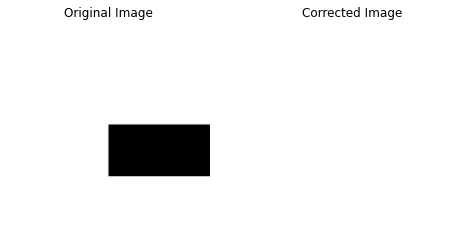

In [4]:
from PIL import Image

# Use the trained autoencoder to generate corrected images
test_image =  Image.open("D:/Perfect Shape Images/Test/rectangle.JPG") # Load your test image here (e.g., a rectangle)
test_image = transform(test_image).unsqueeze(0)  # Preprocess the test image

with torch.no_grad():
    corrected_image = autoencoder(test_image.to("cuda"))

# Display the original and corrected images
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(test_image.squeeze(0).permute(1, 2, 0))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Corrected Image")
plt.imshow(corrected_image.squeeze(0).permute(1, 2, 0).to("cpu"))
plt.axis('off')

plt.show()

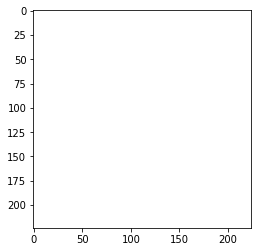

In [5]:
with torch.no_grad():
    plt.imshow(autoencoder(test_image.to("cuda")).to('cpu').squeeze(0).permute(1, 2, 0))

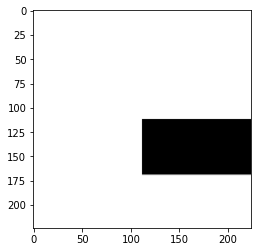

In [6]:
plt.imshow(test_image.squeeze(0).permute(1, 2, 0))
